In [1]:
!pip install \
    numpy \
    matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


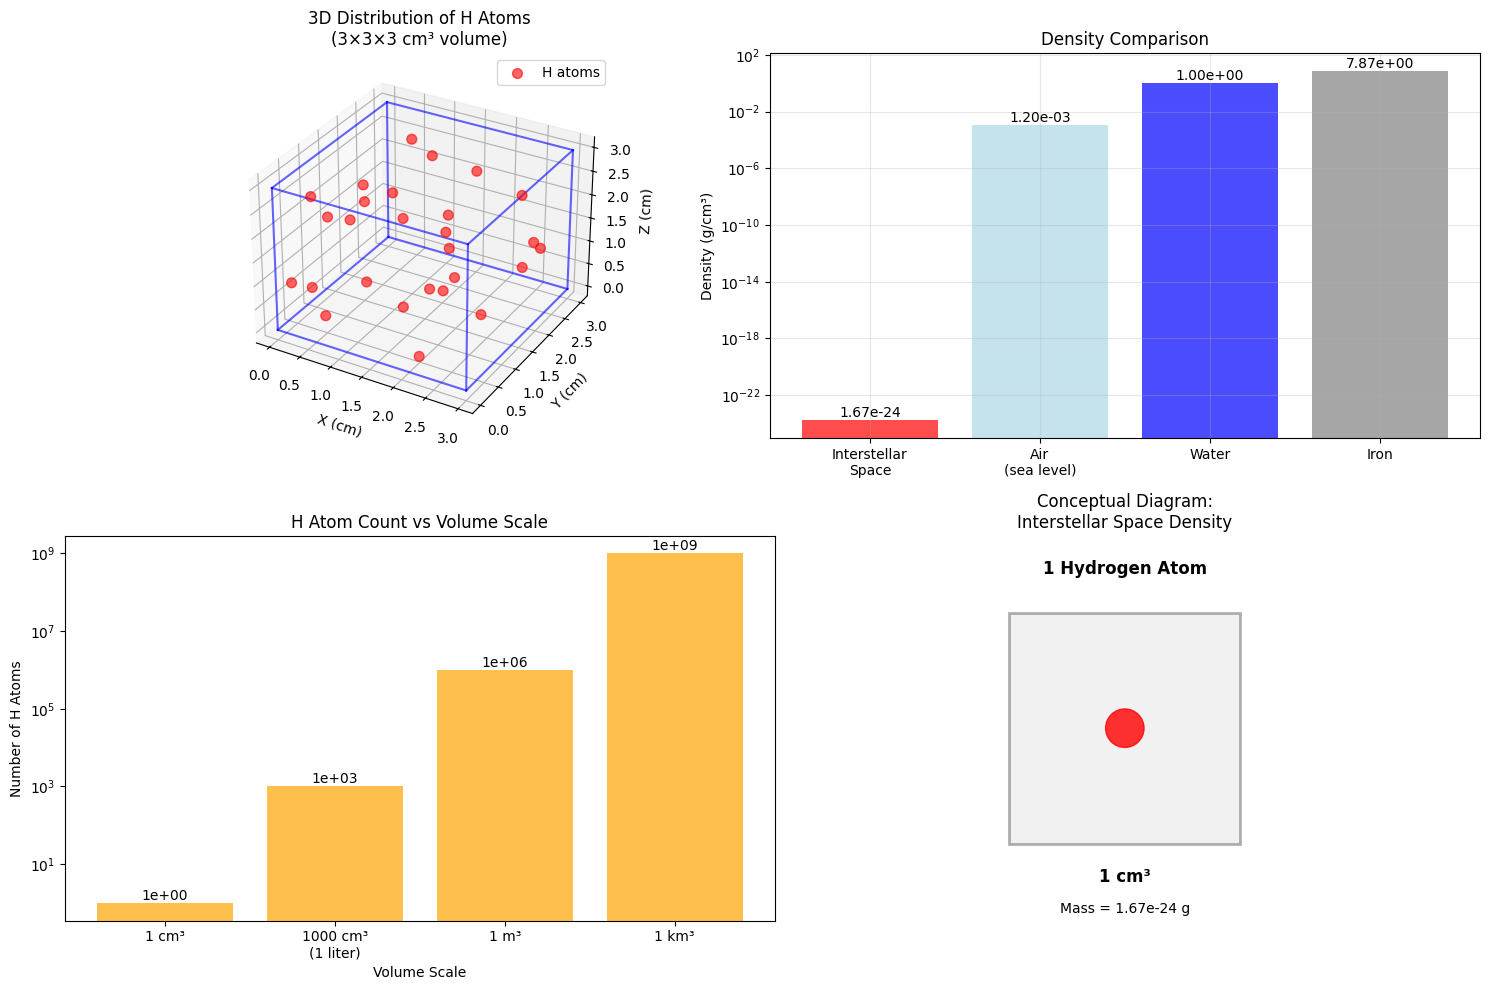

=== INTERSTELLAR SPACE HYDROGEN DENSITY ANALYSIS ===
Number density (N): 1 atoms/cm³
Mass of one hydrogen atom: 1.67e-24 g
Mass density (ρ): 1.67e-24 g/cm³

=== COMPARISON WITH OTHER MATERIALS ===
Interstellar space: 1.67e-24 g/cm³
Air (sea level): 1.20e-03 g/cm³
Water: 1.00 g/cm³
Iron: 7.87 g/cm³

=== SCALE EXAMPLES ===
In 1 m³ (1,000,000 cm³): 1e+06 hydrogen atoms
Total mass in 1 m³: 1.67e-18 g = 1.67e-15 mg

=== PHYSICAL INTERPRETATION ===
Interstellar space is extremely sparse!
It's about 7e+20 times less dense than air at sea level
This demonstrates why space is considered a 'vacuum'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

# Constants
hydrogen_mass = 1.67e-24  # g (mass of hydrogen atom)
number_density = 1  # atoms per cm³
mass_density = number_density * hydrogen_mass  # g/cm³

# Create figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. 3D visualization of hydrogen atoms in a cubic volume
ax1 = fig.add_subplot(221, projection='3d')

# Create a 3x3x3 cm cube to show distribution
cube_size = 3
n_atoms = cube_size**3  # 27 atoms in total

# Generate random positions for hydrogen atoms
np.random.seed(42)
x = np.random.uniform(0, cube_size, n_atoms)
y = np.random.uniform(0, cube_size, n_atoms)
z = np.random.uniform(0, cube_size, n_atoms)

# Plot atoms as red spheres
ax1.scatter(x, y, z, c='red', s=50, alpha=0.6, label='H atoms')

# Draw cube wireframe
cube_edges = [
    [0, 0, 0], [cube_size, 0, 0], [cube_size, cube_size, 0], [0, cube_size, 0],
    [0, 0, cube_size], [cube_size, 0, cube_size], [cube_size, cube_size, cube_size], [0, cube_size, cube_size]
]

# Draw cube edges
for i in range(4):
    ax1.plot3D(*zip(cube_edges[i], cube_edges[(i+1)%4]), 'b-', alpha=0.6)
    ax1.plot3D(*zip(cube_edges[i+4], cube_edges[(i+1)%4+4]), 'b-', alpha=0.6)
    ax1.plot3D(*zip(cube_edges[i], cube_edges[i+4]), 'b-', alpha=0.6)

ax1.set_xlabel('X (cm)')
ax1.set_ylabel('Y (cm)')
ax1.set_zlabel('Z (cm)')
ax1.set_title('3D Distribution of H Atoms\n(3×3×3 cm³ volume)')
ax1.legend()

# 2. Density comparison chart
ax2 = fig.add_subplot(222)

materials = ['Interstellar\nSpace', 'Air\n(sea level)', 'Water', 'Iron']
densities = [1.67e-24, 1.2e-3, 1.0, 7.87]  # g/cm³

colors = ['red', 'lightblue', 'blue', 'gray']
bars = ax2.bar(materials, densities, color=colors, alpha=0.7)

ax2.set_ylabel('Density (g/cm³)')
ax2.set_title('Density Comparison')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, density in zip(bars, densities):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{density:.2e}', ha='center', va='bottom')

# 3. Scale visualization
ax3 = fig.add_subplot(223)

# Show different volume scales
volumes = [1, 1000, 1e6, 1e9]  # cm³
volume_labels = ['1 cm³', '1000 cm³\n(1 liter)', '1 m³', '1 km³']
atom_counts = [v * number_density for v in volumes]

ax3.bar(range(len(volumes)), atom_counts, color='orange', alpha=0.7)
ax3.set_xlabel('Volume Scale')
ax3.set_ylabel('Number of H Atoms')
ax3.set_title('H Atom Count vs Volume Scale')
ax3.set_xticks(range(len(volumes)))
ax3.set_xticklabels(volume_labels)
ax3.set_yscale('log')

# Add value labels
for i, count in enumerate(atom_counts):
    ax3.text(i, count, f'{count:.0e}', ha='center', va='bottom')

# 4. Conceptual diagram
ax4 = fig.add_subplot(224)
ax4.set_xlim(0, 10)
ax4.set_ylim(0, 10)

# Draw a 1 cm³ cube
cube = patches.Rectangle((2, 2), 6, 6, linewidth=2, edgecolor='black', facecolor='lightgray', alpha=0.3)
ax4.add_patch(cube)

# Draw one hydrogen atom in the center
circle = patches.Circle((5, 5), 0.5, color='red', alpha=0.8)
ax4.add_patch(circle)

# Add labels
ax4.text(5, 1, '1 cm³', ha='center', fontsize=12, fontweight='bold')
ax4.text(5, 9, '1 Hydrogen Atom', ha='center', fontsize=12, fontweight='bold')
ax4.text(5, 0.2, f'Mass = {hydrogen_mass:.2e} g', ha='center', fontsize=10)

ax4.set_title('Conceptual Diagram:\nInterstellar Space Density')
ax4.set_aspect('equal')
ax4.axis('off')

plt.tight_layout()
plt.show()

# Print detailed calculations
print("=== INTERSTELLAR SPACE HYDROGEN DENSITY ANALYSIS ===")
print(f"Number density (N): {number_density} atoms/cm³")
print(f"Mass of one hydrogen atom: {hydrogen_mass:.2e} g")
print(f"Mass density (ρ): {mass_density:.2e} g/cm³")
print()
print("=== COMPARISON WITH OTHER MATERIALS ===")
print(f"Interstellar space: {mass_density:.2e} g/cm³")
print(f"Air (sea level): {1.2e-3:.2e} g/cm³")
print(f"Water: 1.00 g/cm³")
print(f"Iron: 7.87 g/cm³")
print()
print("=== SCALE EXAMPLES ===")
print(f"In 1 m³ (1,000,000 cm³): {1e6:.0e} hydrogen atoms")
print(f"Total mass in 1 m³: {1e6 * hydrogen_mass:.2e} g = {1e6 * hydrogen_mass * 1000:.2e} mg")
print()
print("=== PHYSICAL INTERPRETATION ===")
print("Interstellar space is extremely sparse!")
print(f"It's about {1.2e-3/mass_density:.0e} times less dense than air at sea level")
print("This demonstrates why space is considered a 'vacuum'")